In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_excel('Data Analyst _ Sample Data _HDM.xlsx')

In [3]:
df.head()

,Call Id,Lead Id,Campaign ID,Advertiser Id,Hid,Call Status,Lead Status,Agent Duration(seconds),Customer Duration(seconds),From Calling Number,To Calling Number,Attempt No,Created At,Updated At,Agent Id,Agent Name
0,26807,410987,930228,1883,40831aceu6850re1ece43deeqf20a6o,no-answer,Not Interested,8,0,9.186570e+11,9.195528e+11,1,2024-04-01 11:35:19,2024-04-01 11:35:27,2728,Mansi Jaiswal
1,26808,410986,930228,1883,3dc489fbg6850pe1ece43deewf20a6v,completed,Not Interested,51,34,9.186570e+11,9.172755e+11,1,2024-04-01 11:35:27,2024-04-01 11:36:19,2728,Mansi Jaiswal
2,26809,410985,930228,1883,92d7bfbag6850se1ece43deevf20a6y,no-answer,Invalid Number,9,0,9.186570e+11,9.194307e+11,1,2024-04-01 11:36:19,2024-04-01 11:36:28,2728,Mansi Jaiswal
3,26810,410984,930228,1883,3a9872eem6850oe1ece43deetf20a6m,completed,Not Interested,45,25,9.186570e+11,9.183493e+11,1,2024-04-01 11:36:29,2024-04-01 11:37:15,2728,Mansi Jaiswal
4,26811,410981,930228,1883,3dde873bx6850je1ece43deehf20a6u,no-answer,Busy,45,0,9.186570e+11,9.170547e+11,1,2024-04-01 11:37:14,2024-04-01 11:38:00,2728,Mansi Jaiswal


In [4]:
df.shape

(24623, 16)

In [5]:
df.columns

Index(['Call Id', 'Lead Id', 'Campaign ID', 'Advertiser Id', 'Hid',
       'Call Status', 'Lead Status', 'Agent Duration(seconds)',
       'Customer Duration(seconds)', 'From Calling Number',
       'To Calling Number', 'Attempt No', 'Created At', 'Updated At',
       'Agent Id', 'Agent Name'],
      dtype='object')

In [6]:
df.isnull().sum()

Call Id                         0
Lead Id                         0
Campaign ID                     0
Advertiser Id                   0
Hid                             0
Call Status                     0
Lead Status                     0
Agent Duration(seconds)         0
Customer Duration(seconds)      0
From Calling Number           123
To Calling Number               6
Attempt No                      0
Created At                      0
Updated At                      0
Agent Id                        0
Agent Name                      0
dtype: int64

In [7]:
df.dropna(subset=['From Calling Number', 'To Calling Number'], inplace=True)

In [8]:
df.isnull().sum()

Call Id                       0
Lead Id                       0
Campaign ID                   0
Advertiser Id                 0
Hid                           0
Call Status                   0
Lead Status                   0
Agent Duration(seconds)       0
Customer Duration(seconds)    0
From Calling Number           0
To Calling Number             0
Attempt No                    0
Created At                    0
Updated At                    0
Agent Id                      0
Agent Name                    0
dtype: int64

In [9]:
df.dtypes

Call Id                                int64
Lead Id                                int64
Campaign ID                            int64
Advertiser Id                          int64
Hid                                   object
Call Status                           object
Lead Status                           object
Agent Duration(seconds)                int64
Customer Duration(seconds)             int64
From Calling Number                  float64
To Calling Number                    float64
Attempt No                             int64
Created At                    datetime64[ns]
Updated At                    datetime64[ns]
Agent Id                               int64
Agent Name                            object
dtype: object

In [10]:
df['Call Status'].unique()

array(['no-answer', 'completed', 'failed'], dtype=object)

In [11]:
df['Lead Status'].unique()

array(['Not Interested', 'Invalid Number', 'Busy', 'No Answer',
       'Bought Another Product', 'Already Verified', 'Interested',
       'Call Back', 'Already Bought', 'Not Reachable', 'Language Barrier',
       'Voice Issue', 'Not Eligible - Income', 'Hung-up',
       'Not Eligible - Age', 'Ringing', 'Already Buy/ Bought',
       'Out of Geo Location', 'Opt Out', 'Failed', 'Duplicate',
       'Status26'], dtype=object)

In [12]:
df['Agent Name'].unique()

array(['Mansi Jaiswal', 'Mumtaz', 'Wasim Khan', 'Manneajeet Singh',
       'Nainsee Jaiswal', 'Tabassum', 'Shadab Khan', 'Uzma Khan',
       'Manjeet Rawat', 'ATHARV GAWADE', 'Rahul', 'prerna giri',
       'Amitabh Bachchan', 'Mohammad Husain Raza', 'Mayank', 'Shwetha',
       'Gaurav Rawat', 'Abhijit Bhatt', 'priyansh shrotriya',
       'Thahasina Shaik', 'Zubiya', 'Geetanjali Dhiman', 'Niharika Bhatt'],
      dtype=object)

In [13]:
df['Hid'].nunique()

8276

# EDA

In [14]:
df.columns

Index(['Call Id', 'Lead Id', 'Campaign ID', 'Advertiser Id', 'Hid',
       'Call Status', 'Lead Status', 'Agent Duration(seconds)',
       'Customer Duration(seconds)', 'From Calling Number',
       'To Calling Number', 'Attempt No', 'Created At', 'Updated At',
       'Agent Id', 'Agent Name'],
      dtype='object')

In [15]:
# Display summary statistics for numerical columns
df.describe()

,Call Id,Lead Id,Campaign ID,Advertiser Id,Agent Duration(seconds),Customer Duration(seconds),From Calling Number,To Calling Number,Attempt No,Agent Id
count,24494.000000,24494.000000,24494.000000,24494.000000,24494.000000,24494.000000,2.449400e+04,2.449400e+04,24494.000000,24494.000000
mean,39310.755736,432188.856046,930255.507594,1882.256634,36.086960,13.055075,9.186570e+11,3.224943e+11,2.874908,2764.260145
std,7178.553790,13996.492798,17.746849,43.440221,26.848257,25.491065,3.021112e+00,4.325341e+11,1.899452,80.629360
min,26807.000000,342820.000000,930056.000000,367.000000,0.000000,0.000000,9.186570e+11,9.000000e+00,1.000000,1.000000
25%,33130.250000,425464.000000,930247.000000,1883.000000,17.000000,0.000000,9.186570e+11,8.787205e+09,1.000000,2728.000000
50%,39299.500000,438267.500000,930264.000000,1883.000000,33.000000,0.000000,9.186570e+11,9.660858e+09,2.000000,2772.000000
75%,45534.750000,440859.000000,930268.000000,1883.000000,48.000000,19.000000,9.186570e+11,9.183560e+11,4.000000,2791.000000
max,51698.000000,454079.000000,930270.000000,1889.000000,495.000000,476.000000,9.186570e+11,9.199999e+11,11.000000,2804.000000


In [16]:
# Display summary statistics for categorical columns
df.describe(include='object')

,Hid,Call Status,Lead Status,Agent Name
count,24494,24494,24494,24494
unique,8276,3,22,23
top,a10d9fdbp68d6he1ec296088pf2047w,no-answer,No Answer,Nainsee Jaiswal
freq,11,16035,6432,4329


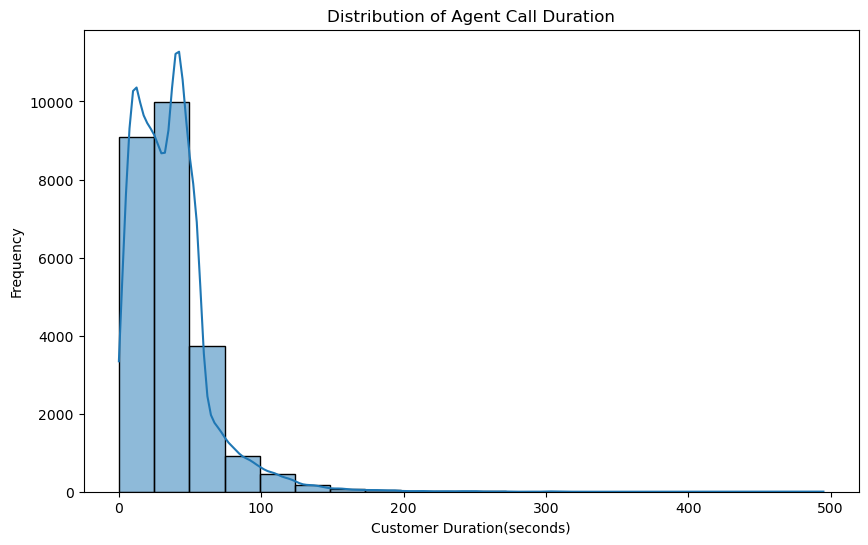

In [17]:
# Histogram of numerical variables
plt.figure(figsize=(10, 6))
sns.histplot(df['Agent Duration(seconds)'], bins=20, kde=True)
plt.title('Distribution of Agent Call Duration')
plt.xlabel('Customer Duration(seconds)')
plt.ylabel('Frequency')
plt.show()

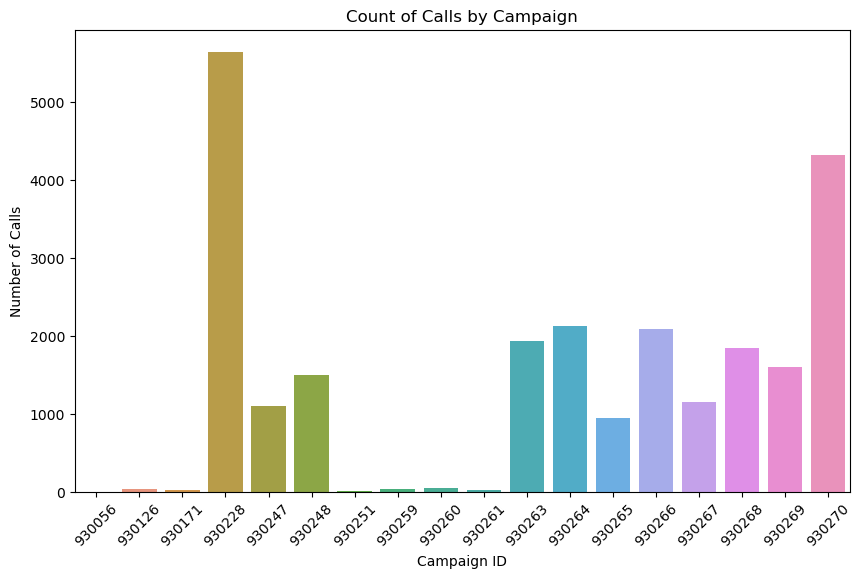

In [18]:
# Count plot of categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x='Campaign ID', data=df)
plt.title('Count of Calls by Campaign')
plt.xlabel('Campaign ID')
plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.show()

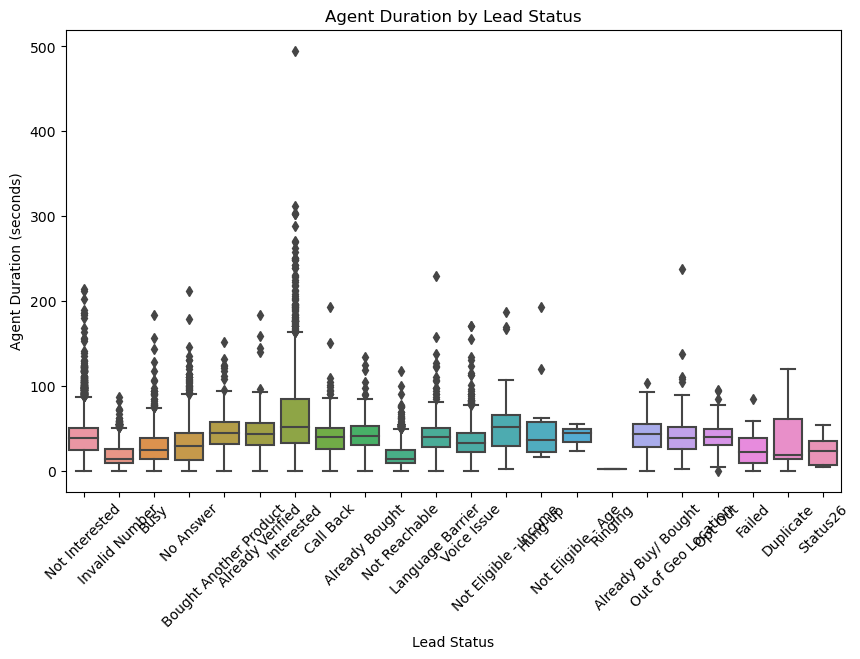

In [19]:
# Boxplot of numerical variables
plt.figure(figsize=(10, 6))
sns.boxplot(x='Lead Status', y='Agent Duration(seconds)', data=df)
plt.title('Agent Duration by Lead Status')
plt.xlabel('Lead Status')
plt.ylabel('Agent Duration (seconds)')
plt.xticks(rotation=45)
plt.show()

In [20]:
New_df = df.copy()

In [21]:
New_df.head()

,Call Id,Lead Id,Campaign ID,Advertiser Id,Hid,Call Status,Lead Status,Agent Duration(seconds),Customer Duration(seconds),From Calling Number,To Calling Number,Attempt No,Created At,Updated At,Agent Id,Agent Name
0,26807,410987,930228,1883,40831aceu6850re1ece43deeqf20a6o,no-answer,Not Interested,8,0,9.186570e+11,9.195528e+11,1,2024-04-01 11:35:19,2024-04-01 11:35:27,2728,Mansi Jaiswal
1,26808,410986,930228,1883,3dc489fbg6850pe1ece43deewf20a6v,completed,Not Interested,51,34,9.186570e+11,9.172755e+11,1,2024-04-01 11:35:27,2024-04-01 11:36:19,2728,Mansi Jaiswal
2,26809,410985,930228,1883,92d7bfbag6850se1ece43deevf20a6y,no-answer,Invalid Number,9,0,9.186570e+11,9.194307e+11,1,2024-04-01 11:36:19,2024-04-01 11:36:28,2728,Mansi Jaiswal
3,26810,410984,930228,1883,3a9872eem6850oe1ece43deetf20a6m,completed,Not Interested,45,25,9.186570e+11,9.183493e+11,1,2024-04-01 11:36:29,2024-04-01 11:37:15,2728,Mansi Jaiswal
4,26811,410981,930228,1883,3dde873bx6850je1ece43deehf20a6u,no-answer,Busy,45,0,9.186570e+11,9.170547e+11,1,2024-04-01 11:37:14,2024-04-01 11:38:00,2728,Mansi Jaiswal


# Label Encoding

In [22]:
# Assuming df is your DataFrame containing the 'Call Status' column
label_encoder = LabelEncoder()

# Fit and transform the 'Call Status' column using LabelEncoder
encoded_labels = label_encoder.fit_transform(New_df['Call Status'])

# Display the mapping of original categories to encoded values
category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapping of original categories to encoded values:")
category_mapping

Mapping of original categories to encoded values:


{'completed': 0, 'failed': 1, 'no-answer': 2}

In [23]:
# Add the encoded labels to the DataFrame
New_df['Call_Status_Encoded'] = encoded_labels

In [24]:
# Assuming df is your DataFrame containing the 'Call Status' column
label_encoder = LabelEncoder()

# Fit and transform the 'Call Status' column using LabelEncoder
encoded_labels1 = label_encoder.fit_transform(New_df['Lead Status'])

# Display the mapping of original categories to encoded values
category_mapping1 = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapping of original categories to encoded values:")
category_mapping1

Mapping of original categories to encoded values:


{'Already Bought': 0,
 'Already Buy/ Bought': 1,
 'Already Verified': 2,
 'Bought Another Product': 3,
 'Busy': 4,
 'Call Back': 5,
 'Duplicate': 6,
 'Failed': 7,
 'Hung-up': 8,
 'Interested': 9,
 'Invalid Number': 10,
 'Language Barrier': 11,
 'No Answer': 12,
 'Not Eligible - Age': 13,
 'Not Eligible - Income': 14,
 'Not Interested': 15,
 'Not Reachable': 16,
 'Opt Out': 17,
 'Out of Geo Location': 18,
 'Ringing': 19,
 'Status26': 20,
 'Voice Issue': 21}

In [25]:
# Add the encoded labels to the DataFrame
New_df['Lead_Status_Encoded'] = encoded_labels1

In [26]:
# Assuming df is your DataFrame containing the 'Call Status' column
label_encoder = LabelEncoder()

# Fit and transform the 'Call Status' column using LabelEncoder
encoded_labels2 = label_encoder.fit_transform(New_df['Agent Name'])

# Display the mapping of original categories to encoded values
category_mapping2 = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapping of original categories to encoded values:")
category_mapping2

Mapping of original categories to encoded values:


{'ATHARV GAWADE': 0,
 'Abhijit Bhatt': 1,
 'Amitabh Bachchan': 2,
 'Gaurav Rawat': 3,
 'Geetanjali Dhiman': 4,
 'Manjeet Rawat': 5,
 'Manneajeet Singh': 6,
 'Mansi Jaiswal': 7,
 'Mayank': 8,
 'Mohammad Husain Raza': 9,
 'Mumtaz': 10,
 'Nainsee Jaiswal': 11,
 'Niharika Bhatt': 12,
 'Rahul': 13,
 'Shadab Khan': 14,
 'Shwetha': 15,
 'Tabassum': 16,
 'Thahasina Shaik': 17,
 'Uzma Khan': 18,
 'Wasim Khan': 19,
 'Zubiya': 20,
 'prerna giri': 21,
 'priyansh shrotriya': 22}

In [27]:
# Add the encoded labels to the DataFrame
New_df['Agent_Name_Encoded'] = encoded_labels2

In [28]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding for 'traceID', 'spanID', and 'parentSpanID' columns
New_df['Hid_encoded'] = label_encoder.fit_transform(New_df['Hid'])

# Display the mapping values for each column
mapping_Hid = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping values for each column
# print("\nMapping values for 'Hid':", mapping_Hid)

In [29]:
# Swap the key-value pairs in the mapping dictionary
swapped_mapping_Hid = {v: k for k, v in mapping_Hid.items()}

# Print the swapped mapping values
# print("\nSwapped Mapping values for 'Hid':", swapped_mapping_Hid)

# Save the swapped mapping values to a text file
with open('swapped_mapping_Hid.txt', 'w') as file:
    for key, value in swapped_mapping_Hid.items():
        file.write(f"{key}: {value}\n")

In [30]:
New_df.head()

,Call Id,Lead Id,Campaign ID,Advertiser Id,Hid,Call Status,Lead Status,Agent Duration(seconds),Customer Duration(seconds),From Calling Number,To Calling Number,Attempt No,Created At,Updated At,Agent Id,Agent Name,Call_Status_Encoded,Lead_Status_Encoded,Agent_Name_Encoded,Hid_encoded
0,26807,410987,930228,1883,40831aceu6850re1ece43deeqf20a6o,no-answer,Not Interested,8,0,9.186570e+11,9.195528e+11,1,2024-04-01 11:35:19,2024-04-01 11:35:27,2728,Mansi Jaiswal,2,15,7,2095
1,26808,410986,930228,1883,3dc489fbg6850pe1ece43deewf20a6v,completed,Not Interested,51,34,9.186570e+11,9.172755e+11,1,2024-04-01 11:35:27,2024-04-01 11:36:19,2728,Mansi Jaiswal,0,15,7,1999
2,26809,410985,930228,1883,92d7bfbag6850se1ece43deevf20a6y,no-answer,Invalid Number,9,0,9.186570e+11,9.194307e+11,1,2024-04-01 11:36:19,2024-04-01 11:36:28,2728,Mansi Jaiswal,2,10,7,4800
3,26810,410984,930228,1883,3a9872eem6850oe1ece43deetf20a6m,completed,Not Interested,45,25,9.186570e+11,9.183493e+11,1,2024-04-01 11:36:29,2024-04-01 11:37:15,2728,Mansi Jaiswal,0,15,7,1891
4,26811,410981,930228,1883,3dde873bx6850je1ece43deehf20a6u,no-answer,Busy,45,0,9.186570e+11,9.170547e+11,1,2024-04-01 11:37:14,2024-04-01 11:38:00,2728,Mansi Jaiswal,2,4,7,2001


In [31]:
# Assuming New_df is your DataFrame
columns_to_drop = ['Hid', 'Call Status', 'Lead Status', 'Agent Name']
New_df.drop(columns=columns_to_drop, inplace=True)

In [32]:
New_df.head()

,Call Id,Lead Id,Campaign ID,Advertiser Id,Agent Duration(seconds),Customer Duration(seconds),From Calling Number,To Calling Number,Attempt No,Created At,Updated At,Agent Id,Call_Status_Encoded,Lead_Status_Encoded,Agent_Name_Encoded,Hid_encoded
0,26807,410987,930228,1883,8,0,9.186570e+11,9.195528e+11,1,2024-04-01 11:35:19,2024-04-01 11:35:27,2728,2,15,7,2095
1,26808,410986,930228,1883,51,34,9.186570e+11,9.172755e+11,1,2024-04-01 11:35:27,2024-04-01 11:36:19,2728,0,15,7,1999
2,26809,410985,930228,1883,9,0,9.186570e+11,9.194307e+11,1,2024-04-01 11:36:19,2024-04-01 11:36:28,2728,2,10,7,4800
3,26810,410984,930228,1883,45,25,9.186570e+11,9.183493e+11,1,2024-04-01 11:36:29,2024-04-01 11:37:15,2728,0,15,7,1891
4,26811,410981,930228,1883,45,0,9.186570e+11,9.170547e+11,1,2024-04-01 11:37:14,2024-04-01 11:38:00,2728,2,4,7,2001


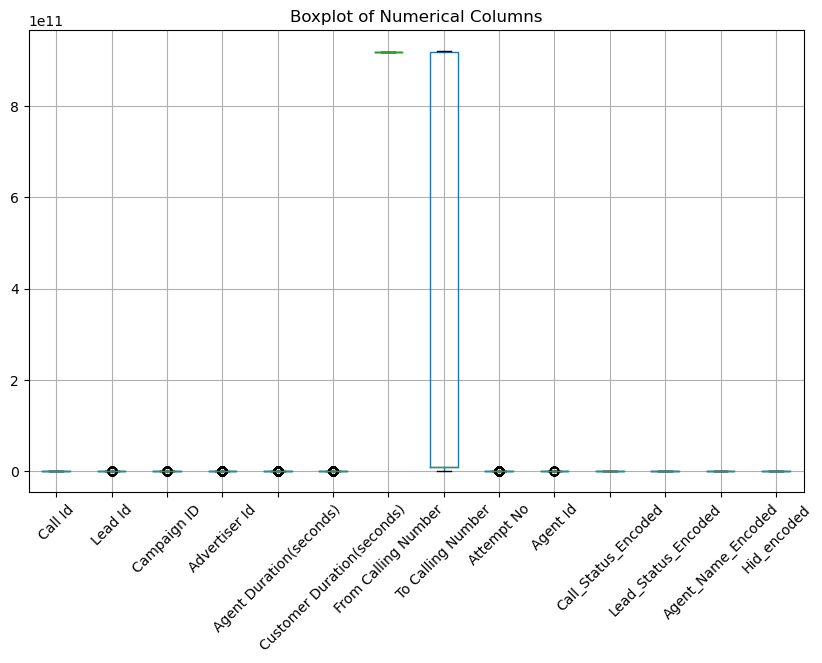

In [33]:
# Boxplot Method
plt.figure(figsize=(10, 6))
New_df.boxplot()
plt.title('Boxplot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()


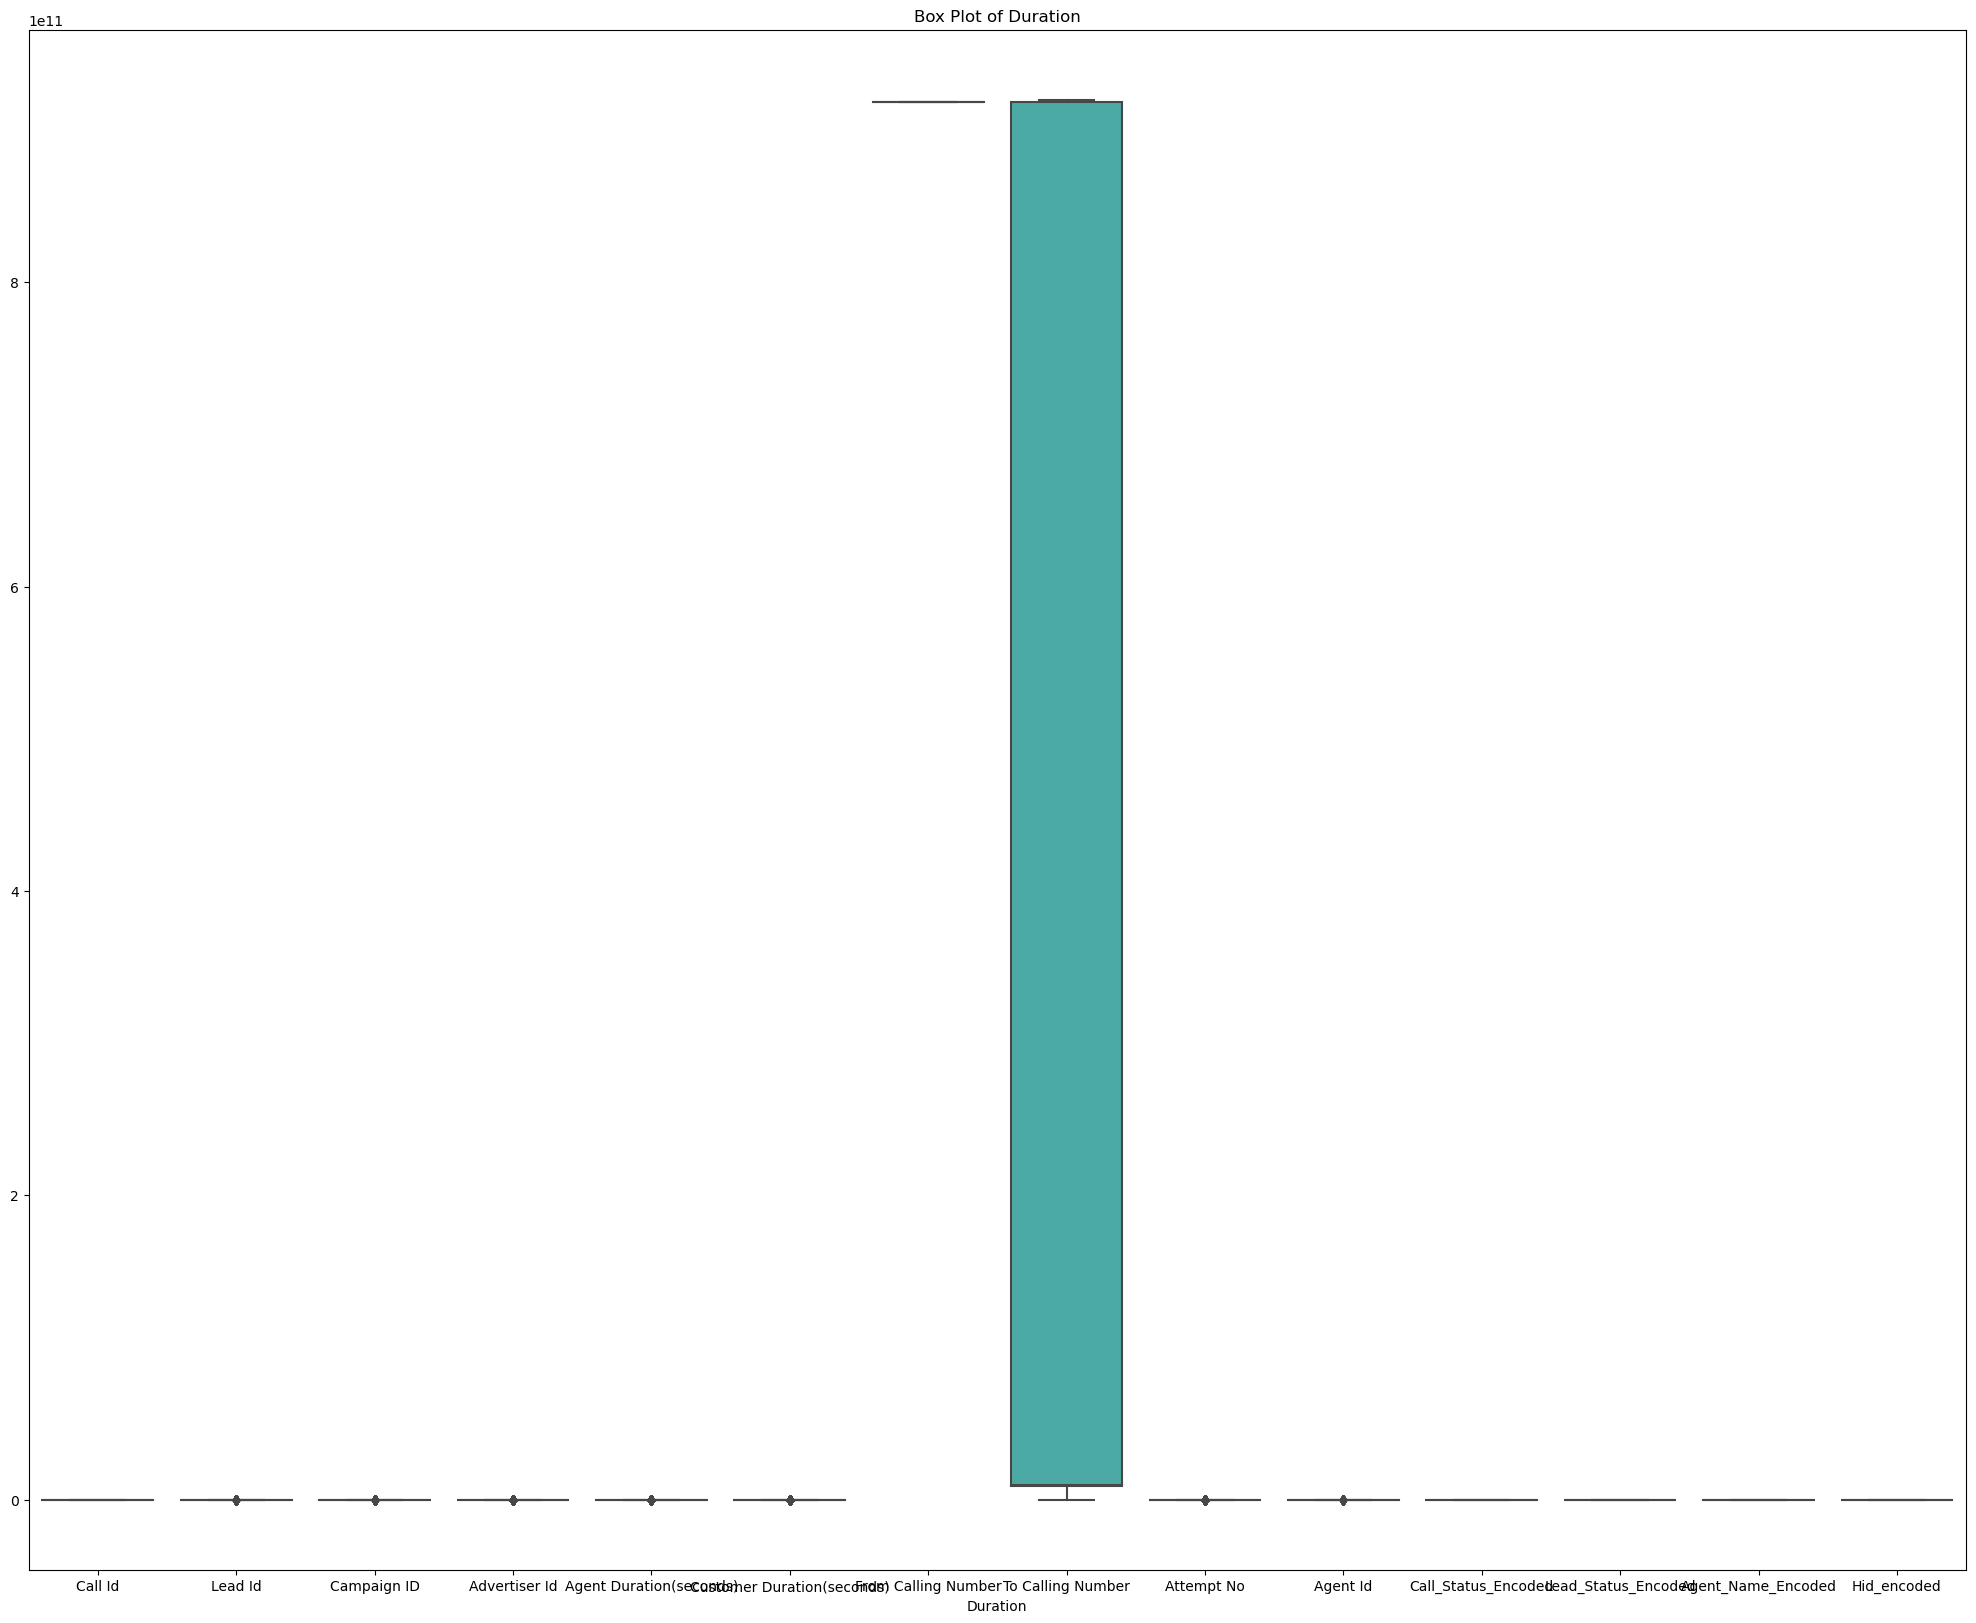

In [34]:
plt.figure(figsize=(25, 20))
sns.boxplot(data=New_df)
plt.title('Box Plot of Duration')
plt.xlabel('Duration')
plt.show()

In [35]:
New_df.dtypes

Call Id                                int64
Lead Id                                int64
Campaign ID                            int64
Advertiser Id                          int64
Agent Duration(seconds)                int64
Customer Duration(seconds)             int64
From Calling Number                  float64
To Calling Number                    float64
Attempt No                             int64
Created At                    datetime64[ns]
Updated At                    datetime64[ns]
Agent Id                               int64
Call_Status_Encoded                    int64
Lead_Status_Encoded                    int64
Agent_Name_Encoded                     int64
Hid_encoded                            int64
dtype: object

/var/folders/5_/gr87l7990pq6c1zhr9t2t40r0000gn/T/ipykernel_18747/1496035148.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = New_df.corr()


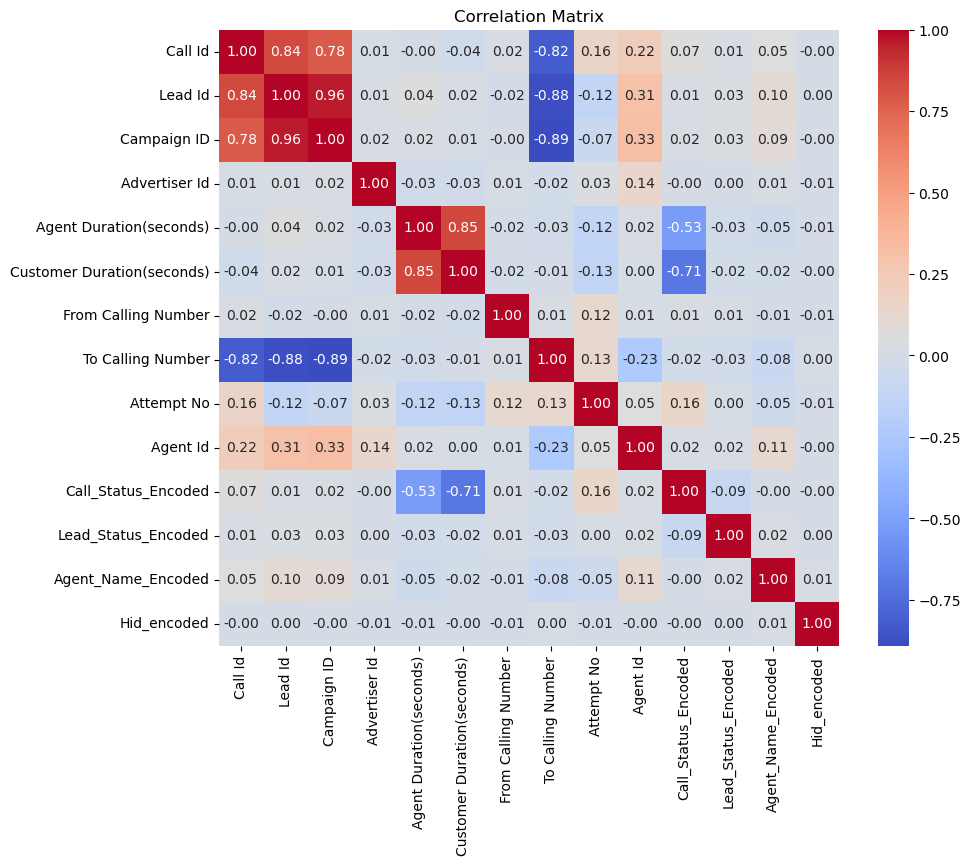

In [36]:
# Correlation matrix heatmap
correlation_matrix = New_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [37]:
New_df.dtypes

Call Id                                int64
Lead Id                                int64
Campaign ID                            int64
Advertiser Id                          int64
Agent Duration(seconds)                int64
Customer Duration(seconds)             int64
From Calling Number                  float64
To Calling Number                    float64
Attempt No                             int64
Created At                    datetime64[ns]
Updated At                    datetime64[ns]
Agent Id                               int64
Call_Status_Encoded                    int64
Lead_Status_Encoded                    int64
Agent_Name_Encoded                     int64
Hid_encoded                            int64
dtype: object

In [38]:
New_df.columns

Index(['Call Id', 'Lead Id', 'Campaign ID', 'Advertiser Id',
       'Agent Duration(seconds)', 'Customer Duration(seconds)',
       'From Calling Number', 'To Calling Number', 'Attempt No', 'Created At',
       'Updated At', 'Agent Id', 'Call_Status_Encoded', 'Lead_Status_Encoded',
       'Agent_Name_Encoded', 'Hid_encoded'],
      dtype='object')

# Report Preparation

## Campaign Performance Report:

In [39]:
df.columns

Index(['Call Id', 'Lead Id', 'Campaign ID', 'Advertiser Id', 'Hid',
       'Call Status', 'Lead Status', 'Agent Duration(seconds)',
       'Customer Duration(seconds)', 'From Calling Number',
       'To Calling Number', 'Attempt No', 'Created At', 'Updated At',
       'Agent Id', 'Agent Name'],
      dtype='object')

### 1. Calculate Metrics

In [40]:
# Total calls (count of call_sid)
total_calls = df['Call Id'].count()

In [41]:
# Unique leads (count of distinct lead_id)
unique_leads = df['Lead Id'].nunique()

In [42]:
# Calls connected (count of call_status = "Answered")
calls_connected = df[df['Call Status'] == 'Answered']['Call Id'].count()

In [43]:
# Unique calls connected (count of distinct lead_id where call_status = "Answered")
unique_calls_connected = df[df['Call Status'] == 'Answered']['Lead Id'].nunique()

In [44]:
# Leads converted (count of call_status = "Interested")
leads_converted = df[df['Lead Status'] == 'Interested']['Call Id'].count()

In [45]:
# Leads lost (count of call_status = "Not Interested")
leads_lost = df[df['Lead Status'] == 'Not Interested']['Call Id'].count()

In [46]:
# Average agent call duration (average of Agent Duration(seconds))
avg_agent_call_duration = df['Agent Duration(seconds)'].mean()

In [47]:
# Average customer call duration (average of Customer Duration(seconds))
avg_customer_call_duration = df['Customer Duration(seconds)'].mean()

### 2. Create Campaign Performance Report

In [48]:
campaign_performance_report = {
    'Total Calls': total_calls,
    'Unique Leads': unique_leads,
    'Calls Connected': calls_connected,
    'Unique Calls Connected': unique_calls_connected,
    'Leads Converted': leads_converted,
    'Leads Lost': leads_lost,
    'Average Agent Call Duration': avg_agent_call_duration,
    'Average Customer Call Duration': avg_customer_call_duration
}

### 3. Print Campaign Performance Report

In [49]:
print("Campaign Performance Report:")
for metric, value in campaign_performance_report.items():
    print(f"{metric}: {value}")

Campaign Performance Report:
Total Calls: 24494
Unique Leads: 8276
Calls Connected: 0
Unique Calls Connected: 0
Leads Converted: 3446
Leads Lost: 4907
Average Agent Call Duration: 36.08696007185433
Average Customer Call Duration: 13.05507471217441


### 4. Export Report to CSV

In [50]:
report_df = pd.DataFrame.from_dict(campaign_performance_report, orient='index', columns=['Value'])
report_df.to_csv("campaign_performance_report.csv")

## Lead Disposition Report:

### 1. Count the occurrences of each call status

In [51]:
call_status_counts = df['Call Status'].value_counts()

### 2. Visualize the distribution

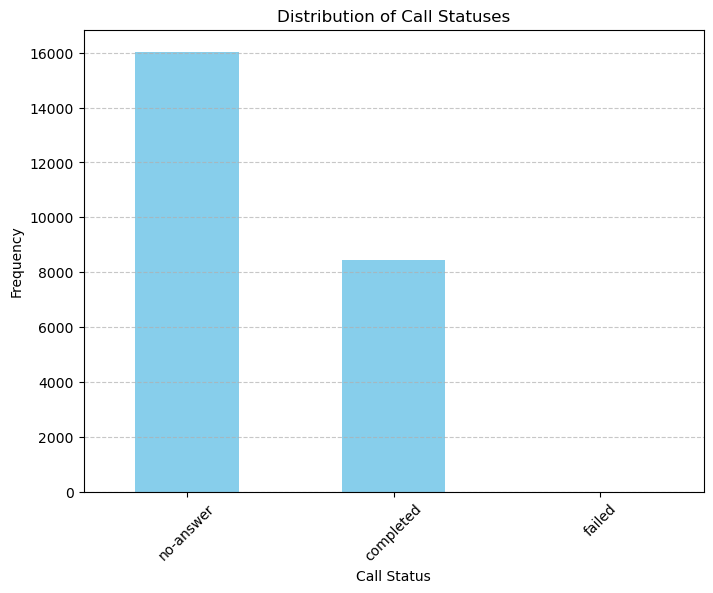

In [52]:
plt.figure(figsize=(8, 6))
call_status_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Call Statuses')
plt.xlabel('Call Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 3. Analyze the outcomes

In [53]:
print("Call Status Distribution:")
print(call_status_counts)

Call Status Distribution:
no-answer    16035
completed     8454
failed           5
Name: Call Status, dtype: int64


## Agent Performance Report:

### 1. Number of calls made per agent

In [54]:
calls_per_agent = df.groupby('Agent Name')['Call Id'].count()

### 2. Calls connected per agent

In [55]:
calls_connected_per_agent = df[df['Call Status'] == 'completed'].groupby('Agent Name')['Call Id'].count()

### 3. Leads converted per agent

In [56]:
leads_converted_per_agent = df[df['Lead Status'] == 'Interested'].groupby('Agent Name')['Lead Id'].count()

### 4. Average agent call duration per agent

In [57]:
avg_agent_call_duration = df.groupby('Agent Name')['Agent Duration(seconds)'].mean()

### 5. Average customer call duration per agent

In [58]:
avg_customer_call_duration = df.groupby('Agent Name')['Customer Duration(seconds)'].mean()

### 6.Display the Agent Performance Report

In [59]:
agent_performance_report = pd.DataFrame({
    'Number of Calls Made': calls_per_agent,
    'Calls Connected': calls_connected_per_agent,
    'Leads Converted': leads_converted_per_agent,
    'Average Agent Call Duration (seconds)': avg_agent_call_duration,
    'Average Customer Call Duration (seconds)': avg_customer_call_duration
})

agent_performance_report

,Number of Calls Made,Calls Connected,Leads Converted,Average Agent Call Duration (seconds),Average Customer Call Duration (seconds)
Agent Name,,,,,
ATHARV GAWADE,386,132.0,31.0,39.007772,15.225389
Abhijit Bhatt,1144,434.0,142.0,47.039336,18.790210
Amitabh Bachchan,997,201.0,117.0,22.425276,6.158475
Gaurav Rawat,44,13.0,8.0,45.181818,18.500000
Geetanjali Dhiman,528,130.0,46.0,37.636364,13.119318
Manjeet Rawat,662,224.0,69.0,37.415408,9.685801
Manneajeet Singh,27,11.0,4.0,21.481481,9.518519
Mansi Jaiswal,4121,1553.0,696.0,37.227129,13.658578
Mayank,57,20.0,5.0,35.508772,14.087719


## Additional Reports:

### 1.Call Duration Analysis:

#### Distribution of Agent Call Duration

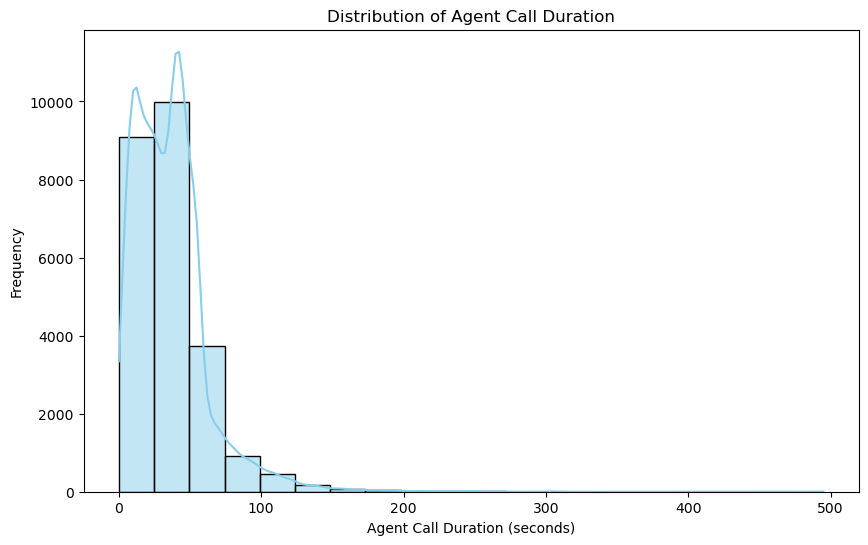

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Agent Duration(seconds)'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Agent Call Duration')
plt.xlabel('Agent Call Duration (seconds)')
plt.ylabel('Frequency')
plt.show()


#### Distribution of Customer Call Duration

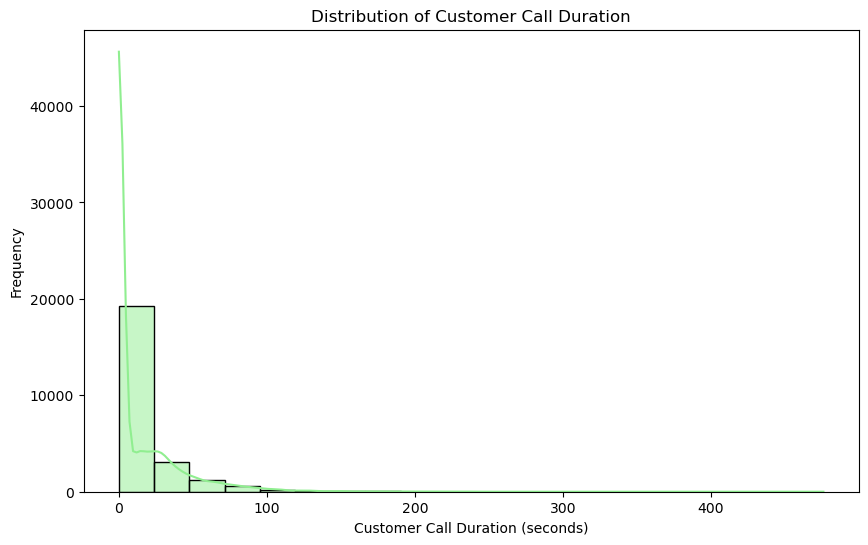

In [61]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Customer Duration(seconds)'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Customer Call Duration')
plt.xlabel('Customer Call Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

### 2.Campaign Conversion Rate Analysis:

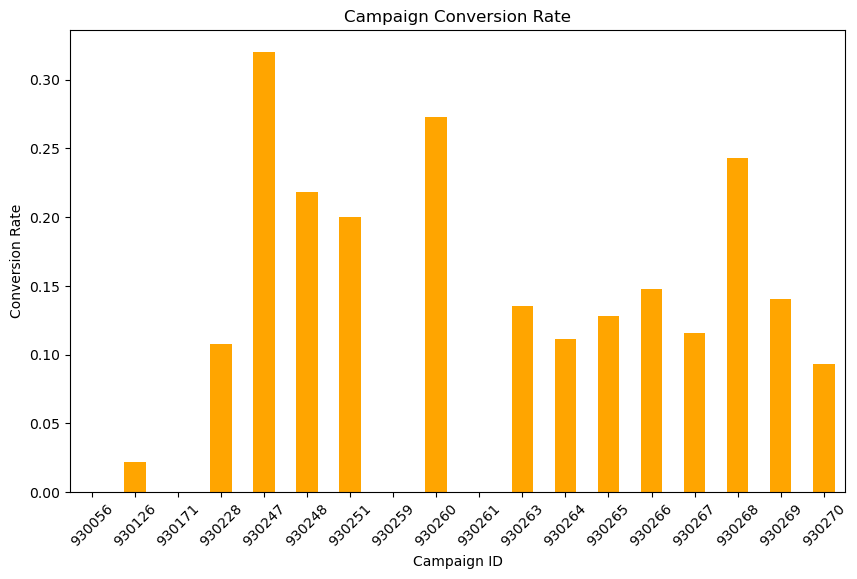

In [62]:
# Calculate conversion rate for each campaign
campaign_conversion_rate = df.groupby('Campaign ID')['Lead Status'].apply(lambda x: (x == 'Interested').mean())

# Plot campaign conversion rate
plt.figure(figsize=(10, 6))
campaign_conversion_rate.plot(kind='bar', color='orange')
plt.title('Campaign Conversion Rate')
plt.xlabel('Campaign ID')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.show()

### 3.Agent Performance Comparison:

In [63]:
# Calculate metrics for each agent
agent_performance = df.groupby('Agent Name').agg({
    'Call Id': 'count',
    'Agent Duration(seconds)': 'mean',
    'Customer Duration(seconds)': 'mean',
    'Lead Status': lambda x: (x == 'Interested').mean()
})

In [64]:
agent_performance.rename(columns={
    'Call Id': 'Total Calls',
    'Agent Duration(seconds)': 'Average Agent Call Duration',
    'Customer Duration(seconds)': 'Average Customer Call Duration',
    'Lead Status': 'Conversion Rate'
}, inplace=True)

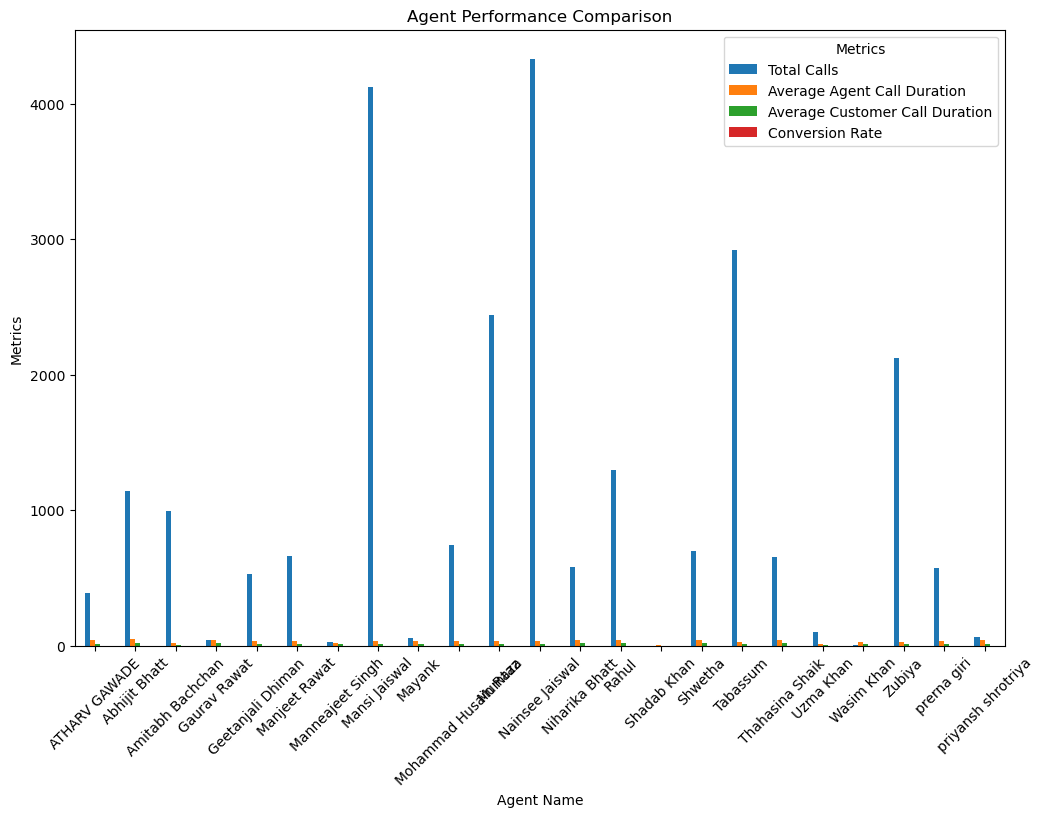

In [65]:
# Plot agent performance metrics
agent_performance.plot(kind='bar', figsize=(12, 8))
plt.title('Agent Performance Comparison')
plt.xlabel('Agent Name')
plt.ylabel('Metrics')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.show()

# Forecasting Objectives

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from fbprophet import Prophet
import sys

In [66]:
New_df.columns

Index(['Call Id', 'Lead Id', 'Campaign ID', 'Advertiser Id',
       'Agent Duration(seconds)', 'Customer Duration(seconds)',
       'From Calling Number', 'To Calling Number', 'Attempt No', 'Created At',
       'Updated At', 'Agent Id', 'Call_Status_Encoded', 'Lead_Status_Encoded',
       'Agent_Name_Encoded', 'Hid_encoded'],
      dtype='object')

## Call Volume Forecast:

In [94]:
df2 = New_df.copy()

In [97]:
df2.columns

Index(['Call Id', 'Lead Id', 'Campaign ID', 'Advertiser Id',
       'Agent Duration(seconds)', 'Customer Duration(seconds)',
       'From Calling Number', 'To Calling Number', 'Attempt No', 'Created At',
       'Updated At', 'Agent Id', 'Call_Status_Encoded', 'Lead_Status_Encoded',
       'Agent_Name_Encoded', 'Hid_encoded'],
      dtype='object')

In [98]:
# Convert 'Timestamp' column to datetime type
df2['Created At'] = pd.to_datetime(df2['Created At'])

# Extracting date and time components into separate columns
df2['C_date_column'] = df2['Created At'].dt.date
df2['C_time_column'] = df2['Created At'].dt.time

In [100]:
df2.dtypes

Call Id                                int64
Lead Id                                int64
Campaign ID                            int64
Advertiser Id                          int64
Agent Duration(seconds)                int64
Customer Duration(seconds)             int64
From Calling Number                  float64
To Calling Number                    float64
Attempt No                             int64
Created At                    datetime64[ns]
Updated At                    datetime64[ns]
Agent Id                               int64
Call_Status_Encoded                    int64
Lead_Status_Encoded                    int64
Agent_Name_Encoded                     int64
Hid_encoded                            int64
C_date_column                         object
C_time_column                         object
dtype: object

In [102]:
# Drop the 'From Calling Number' and 'To Calling Number' columns
df2 = df2.drop(['From Calling Number', 'To Calling Number'], axis=1)

In [106]:
df2['C_date_column'] = pd.to_datetime(df2['C_date_column'])

In [108]:
# Override np.float with the built-in float
sys.modules['numpy'].float = float

In [111]:
# Override np.int with the built-in int
sys.modules['numpy'].int = int

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/arul/anaconda3/lib/python3.11/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/arul/anaconda3/lib/python3.11/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/arul/anaconda3/lib/python3.11/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -3.62514
Iteration  1. Log joint probability =    22.8171. Improved by 26.4423.
Iteration  2. Log joint probability =    31.0843. Improved by 8.26722.
Iteration  3. Log joint probability =    33.1047. Improved by 2.02034.
Iteration  4. Log joint probability =    33.6348. Improved by 0.530123.
Iteration  5. Log joint probability =    33.6597. Improved by 0.0249156.
Iteration  6. Log joint probability =    33.7038. Improved by 0.0441097.
Iteration  7. Log joint probability =    33.7542. Improved by 0.0503746.
Iteration  8. Log joint probability =    33.7963. Improved by 0.0421361.
Iteration  9. Log joint probability =    33.8547. Improved by 0.0583144.
Iteration 10. Log joint probability =    33.8826. Improved by 0.0279071.
Iteration 11. Log joint probability =    33.9257. Improved by 0.0431281.
Iteration 12. Log joint probability =    34.0135. Improved by 0.0878508.
Iteration 13. Log joint probability =    34.0467. Improved by 0.0331341.
Iteration 14. Lo

/var/folders/5_/gr87l7990pq6c1zhr9t2t40r0000gn/T/ipykernel_18747/1907751449.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y_pred'] = forecast['yhat'].tail(len(test_data))


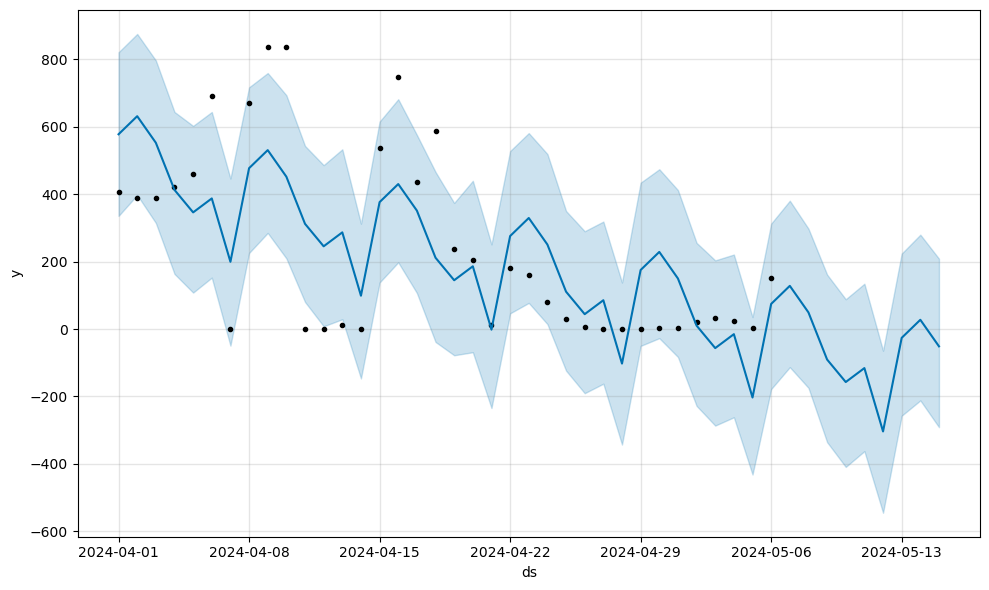

In [112]:
daily_call_volume = df2.groupby(pd.Grouper(key='C_date_column', freq='D')).size().reset_index(name='call_volume')

# Rename columns as expected by Prophet
daily_call_volume.rename(columns={'C_date_column': 'ds', 'call_volume': 'y'}, inplace=True)

# Split the data into train and test sets
train_size = int(0.8 * len(daily_call_volume))
train_data = daily_call_volume[:train_size]
test_data = daily_call_volume[train_size:]

# Initialize Prophet model
model = Prophet()

# Fit the model to the training data
model.fit(train_data)

# Make predictions on the test data
future_dates = model.make_future_dataframe(periods=len(test_data))
forecast = model.predict(future_dates)

# Evaluate the model
test_data['y_pred'] = forecast['yhat'].tail(len(test_data))

# Compute evaluation metrics (e.g., Mean Absolute Error)
mae = abs(test_data['y'] - test_data['y_pred']).mean()
print("Mean Absolute Error:", mae)

# Plot the forecast
fig = model.plot(forecast)

## Agent Efficiency Forecast:

In [123]:
df3 = New_df.copy()

In [125]:
# Select relevant columns
X = df3[['Customer Duration(seconds)', 'Attempt No',
        'Agent Id', 'Call_Status_Encoded', 'Lead_Status_Encoded', 'Agent_Name_Encoded']]
y = df3['Agent Duration(seconds)']  # Assuming "Average Handling Time" is your target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 181.31379169982804


/var/folders/5_/gr87l7990pq6c1zhr9t2t40r0000gn/T/ipykernel_18747/2018200911.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prophet_df['ds'] = pd.to_datetime(prophet_df['ds'])  # Convert to datetime if not already
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/Users/arul/anaconda3/lib/python3.11/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -43.2768
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       47184.1   0.000422724       916.427       0.922       0.922      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       47199.3   6.00747e-05       356.646      0.4573      0.4573      226   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       47202.4    0.00121209       717.793      0.9226      0.9226      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       47205.1   0.000181971       272.717           1           1      450   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       47205.6   2.15052e-05       75.7722           1           1      571   
    Iter      log prob        ||dx||      ||grad||       alpha  

/Users/arul/anaconda3/lib/python3.11/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/arul/anaconda3/lib/python3.11/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


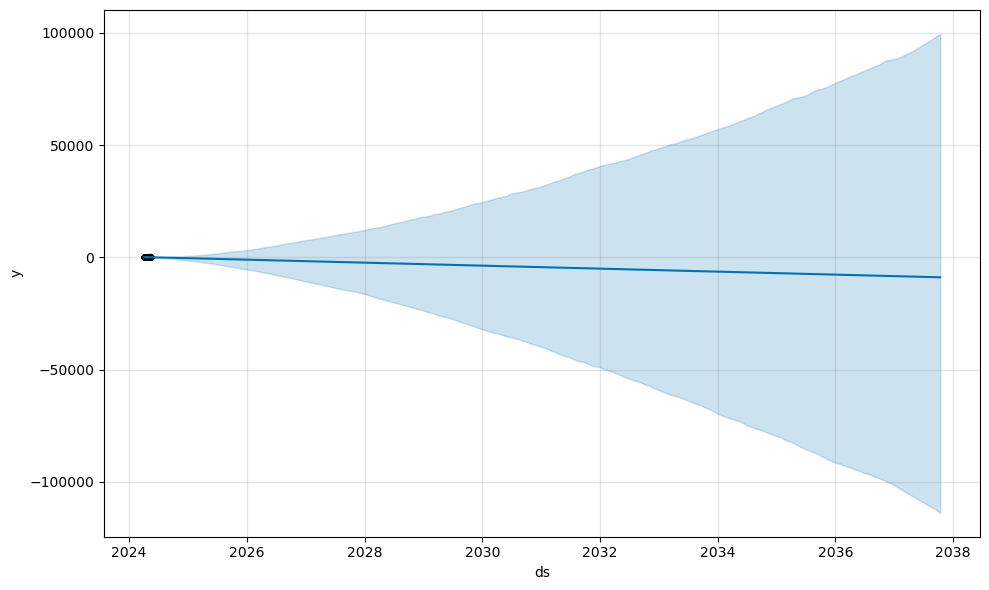

In [127]:
prophet_df = df3[['Created At', 'Agent Duration(seconds)']]
prophet_df.columns = ['ds', 'y']  # Rename columns for Prophet
prophet_df['ds'] = pd.to_datetime(prophet_df['ds'])  # Convert to datetime if not already

# Split the data into train and test sets
train_size = int(0.8 * len(prophet_df))
train_data = prophet_df[:train_size]
test_data = prophet_df[train_size:]

# Initialize and fit Prophet model
model = Prophet()
model.fit(train_data)

# Make predictions on the test data
future_dates = model.make_future_dataframe(periods=len(test_data))
forecast = model.predict(future_dates)

# Visualize the forecast
fig = model.plot(forecast)

## Resource Allocation Forecast:

In [128]:
df4 = New_df.copy()

In [129]:
# Aggregate durations per hour (or per day, depending on the granularity)
df4['Total_Duration'] = df4['Agent Duration(seconds)'] + df4['Customer Duration(seconds)']
df4['Call_Volume'] = df4.groupby(pd.to_datetime(df4['Created At']).dt.floor('H'))['Total_Duration'].transform('sum')

In [131]:
# Select relevant features and target variable
X = df4[['Agent Id', 'Call_Status_Encoded', 'Agent_Name_Encoded', 'Hid_encoded']]
y = df4['Call_Volume']  # Using the calculated call volume as the target variable

In [132]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 22308043.484915894


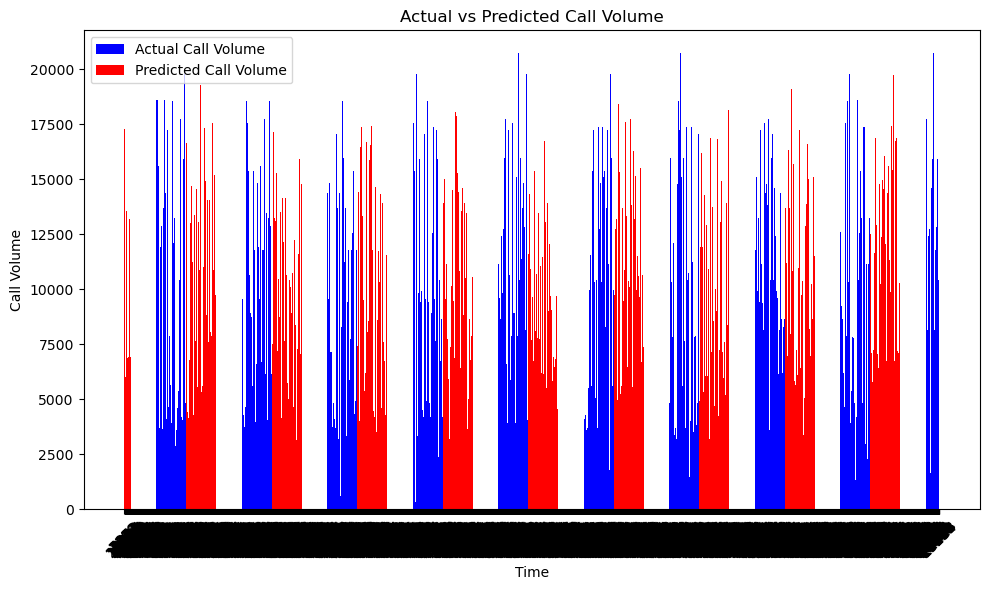

In [134]:
# Set the width of the bars
bar_width = 0.35

# Generate the x values for the bars
x = np.arange(len(y_test))

# Plot actual vs predicted call volume using bar chart
plt.figure(figsize=(10, 6))
plt.bar(x, y_test, width=bar_width, label='Actual Call Volume', color='blue')
plt.bar(x + bar_width, y_pred, width=bar_width, label='Predicted Call Volume', color='red')
plt.xlabel('Time')
plt.ylabel('Call Volume')
plt.title('Actual vs Predicted Call Volume')
plt.xticks(x + bar_width / 2, y_test.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Lead Conversion Forecast:

In [135]:
df5 = New_df.copy()

In [137]:
df5.columns

Index(['Call Id', 'Lead Id', 'Campaign ID', 'Advertiser Id',
       'Agent Duration(seconds)', 'Customer Duration(seconds)',
       'From Calling Number', 'To Calling Number', 'Attempt No', 'Created At',
       'Updated At', 'Agent Id', 'Call_Status_Encoded', 'Lead_Status_Encoded',
       'Agent_Name_Encoded', 'Hid_encoded'],
      dtype='object')

In [138]:
# Define features (X) and target variable (y)
X = df5[['Agent Duration(seconds)', 'Customer Duration(seconds)',
        'Call_Status_Encoded', 'Agent Id', 'Lead_Status_Encoded',
        'Agent_Name_Encoded', 'Hid_encoded']]
y = df5['Lead_Status_Encoded']  # Target variable - number of leads converted

In [139]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.0818534394774635e-06


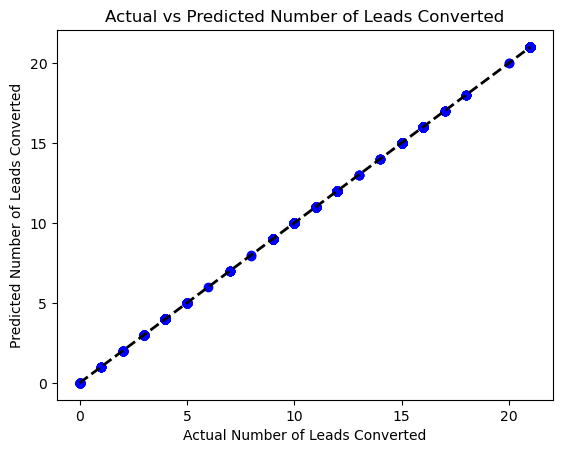

In [140]:
# Plot actual vs predicted values
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Number of Leads Converted')
plt.ylabel('Predicted Number of Leads Converted')
plt.title('Actual vs Predicted Number of Leads Converted')
plt.show()

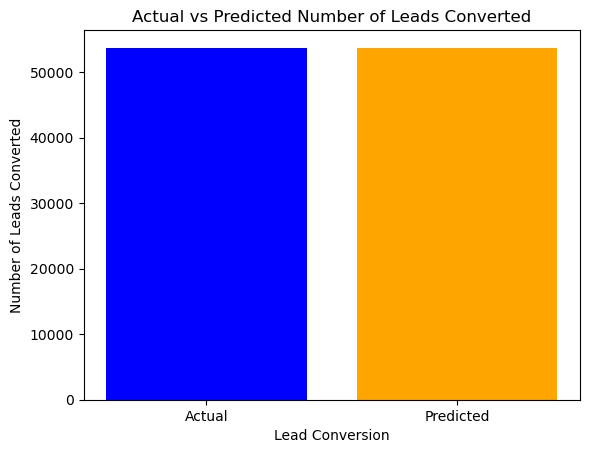

In [141]:
# Calculate the total number of leads converted
total_leads_converted_actual = sum(y_test)
total_leads_converted_predicted = sum(y_pred)

# Create labels and values for the bar chart
labels = ['Actual', 'Predicted']
values = [total_leads_converted_actual, total_leads_converted_predicted]

# Plot the bar chart
plt.bar(labels, values, color=['blue', 'orange'])
plt.xlabel('Lead Conversion')
plt.ylabel('Number of Leads Converted')
plt.title('Actual vs Predicted Number of Leads Converted')
plt.show()